# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [5]:
sensor.isnull().sum()
#no null values in dataset

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [14]:
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [26]:
sensor["time"] = pd.date_range(start = '1/1/2018 00:00:00', end = '1/1/2018 00:29:10',periods = 1751)


Assign the time series index to the dataframe's index.

In [6]:
sensor = sensor.set_index("time")

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [221]:
res_1 = seasonal_decompose(sensor["userAcceleration.x"], model="additive", period = 60)

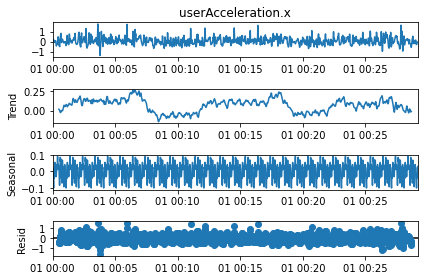

In [222]:
res_1.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

In [106]:
res_2 = seasonal_decompose(sensor["rotationRate.x"], model="additive", period = 60)

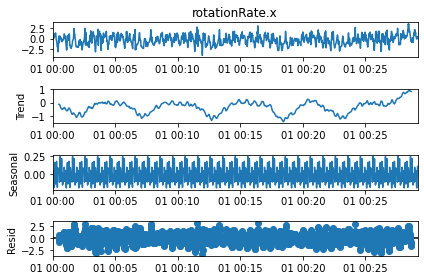

In [108]:
res_2.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

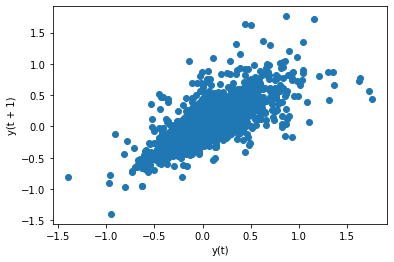

In [66]:
pd.plotting.lag_plot(sensor["userAcceleration.x"], lag=1);
# We can see a clear pattern in the userAcceleration.x variable, which means the data is storngly not-random

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(sensor["userAcceleration.x"])

Create a lag plot for `rotationRate.x`

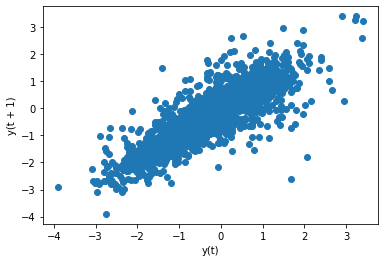

In [67]:
pd.plotting.lag_plot(sensor["rotationRate.x"], lag=1);

What are your conclusions from both visualizations?

In [58]:
# We can see that in both cases there is a clear upwards pattern, which means that the data in both of them in not-random

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [89]:
from statsmodels.tsa.stattools import adfuller

In [90]:
adfuller(sensor["userAcceleration.x"], maxlag=None, regression='c')  

(-17.95799408616975,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [92]:
adfuller(sensor["rotationRate.x"], maxlag=None, regression='c')

(-5.269860625086409,
 6.320230335912605e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

In [ ]:
# The p-value (second number on the list) in both cases is inferior to all three critical values, so we can accept the nul hipothesis 
# that there is a unit root, which means

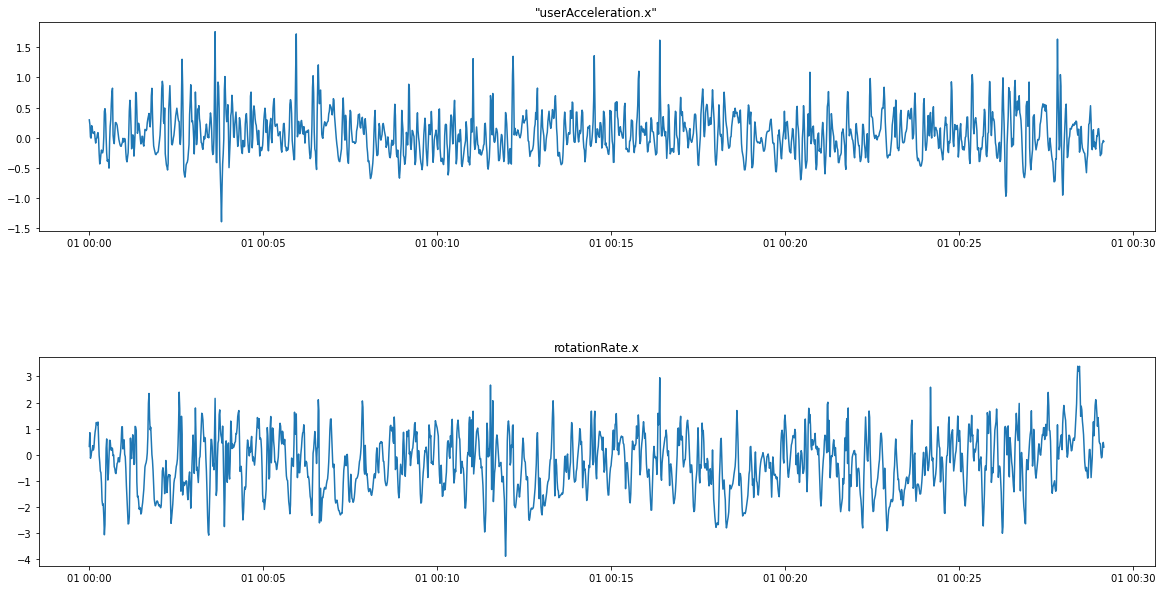

In [93]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (20,10))
plt.subplots_adjust(hspace = 0.6)

ax1.plot(sensor["userAcceleration.x"])
ax1.title.set_text('"userAcceleration.x"')

ax2.plot(sensor["rotationRate.x"])
ax2.title.set_text("rotationRate.x")


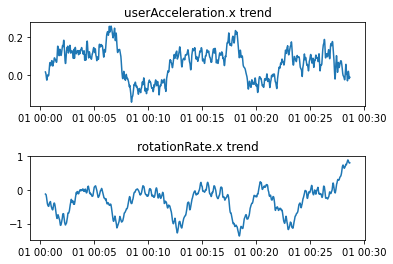

In [113]:
f, (ax1, ax2) = plt.subplots(2,1)
plt.subplots_adjust(hspace = 0.6)

ax1.plot(res_1.trend)
ax1.title.set_text("userAcceleration.x trend")

ax2.plot(res_2.trend)
ax2.title.set_text("rotationRate.x trend")

What are your conclusions from this test?

In [115]:
# The above explanation together with the following graps allow us to confirm that the data is stationary
# The stationary movement is no very clear in the case of useAcceleration.x, but in rotationRate.x is more visible that the
# movement inceasessuring 2:30 mins and the falls to increase again in 30 seconds.
# However, in the last plots, we can see that in the last period, the stationality is being lost, specially in rotationRate.x
# where there is a clear excesive increase.This event may have happened beacuse of an excess cellphone use.

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [98]:
from statsmodels.tsa.arima.model import ARIMA

In [122]:
arma = ARIMA(sensor["userAcceleration.x"], order=(2, 1, 0)).fit()
print(arma_mod20.params)

C:\Users\juanp\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
C:\Users\juanp\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
C:\Users\juanp\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


ar.L1     0.403930
ar.L2    -0.320698
sigma2    0.046175
dtype: float64


In [124]:
print(arma.aic, arma.bic, arma.hqic)

-409.1055840183612 -392.7034708176085 -403.04232598798603


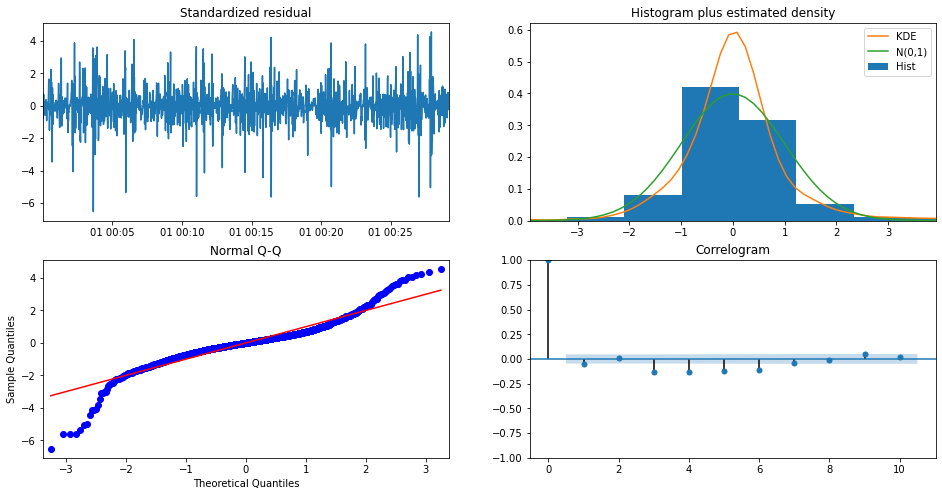

In [125]:
arma.plot_diagnostics(figsize=(16, 8))
plt.show()

In [191]:
sensor["seconds"] = sensor.index.second

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [213]:
from sklearn.linear_model import LinearRegression
from statsmodels.tools.eval_measures import rmse

In [199]:
lr = LinearRegression()
lr.fit(
    sensor[["seconds"]], 
    sensor["userAcceleration.x"]
)

LinearRegression()

In [211]:
sensor["predict_linear"] = lr.predict(sensor[["seconds"]])

In [214]:
last = sensor.tail(10)

In [220]:
rmse(last["userAcceleration.x"], last.predict_linear)

0.2157596614609276